Codes regarding the class 71 - Malarial cell classification using CNN do canal DigitalSreeni (https://www.youtube.com/watch?v=R9PPxpzj5tI&t=4s)

The idea is to train a convolutional network capable of distinguish cells contaminated with malaria from healthy ones

In [1]:
import numpy as np
import os
import cv2
from PIL import Image
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1000)
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
cell_directory = '/home/ecampelo/Documentos/Machine learning/Data_files/cell_images'
size = 64

In [4]:
parasitized_images = os.listdir(os.path.join(cell_directory, 'Parasitized')) # 13.780 images
uninfected_images = os.listdir(os.path.join(cell_directory, 'Uninfected')) # 13.780 images

## Reading the Images

In [76]:
# readind the first 100 images just for study
# I changed the order of data reading so I can have [0,1] on label therefore np.argmax would show index 0 
# for health cells and 1 for parasitized.
dataset = []
label = []
limit = 500
for i, image_name in enumerate(uninfected_images[:limit]):
    if image_name.split('.')[1] == 'png':
        # reads as array
        image = cv2.imread(os.path.join(cell_directory, 'Uninfected', image_name))
        # convert to image
        image = Image.fromarray(image, 'RGB')
        # resize it 
        image = image.resize((size, size))
        # load it to the dataset as an array
        dataset.append(np.array(image))
        # creates the label for uninfected cells
        label.append(0)

In [77]:

for i, image_name in enumerate(parasitized_images[:limit]):
    if image_name.split('.')[1] == 'png':
        # reads as array
        image = cv2.imread(os.path.join(cell_directory, 'Parasitized', image_name))
        # convert to image
        image = Image.fromarray(image, 'RGB')
        # resize it 
        image = image.resize((size, size))
        # load it to the dataset as an array
        dataset.append(np.array(image))
        # creates the label for parasitized cells
        label.append(1)

## Defining the network

In [71]:
layer = keras.layers

input_shape = (size, size, 3)

# input 
input_layer = layer.Input(shape= input_shape)

# convolutions
convolution1 = layer.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(input_layer)
pool1 = layer.MaxPooling2D(pool_size=(2,2))(convolution1) # extracts the max number on a basis 2x2 matrix
normalization1 = layer.BatchNormalization(axis= -1)(pool1) 
drop1 = layer.Dropout(rate=0.2)(normalization1) # drops 20% of nodes result

convolution2 = layer.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = layer.MaxPooling2D(pool_size=(2,2))(convolution2) # extracts the max number on a basis 2x2 matrix
normalization2 = layer.BatchNormalization(axis= -1)(pool2) 
drop2 = layer.Dropout(rate=0.2)(normalization2) # drops 20% of nodes result

flat = layer.Flatten()(drop2)

# Dense part
hidden1 = layer.Dense(512, activation= 'relu')(flat)
normalization3 = layer.BatchNormalization(axis= -1)(hidden1) 
drop3 = layer.Dropout(rate=0.2)(normalization3) # drops 20% of nodes result

hidden2 = layer.Dense(512, activation= 'relu')(drop3)
normalization4 = layer.BatchNormalization(axis= -1)(hidden2) 
drop4 = layer.Dropout(rate=0.2)(normalization4) # drops 20% of nodes result

# output
output_layer = layer.Dense(2, activation= 'sigmoid')(drop4)

# the model
model = keras.Model(inputs = input_layer, outputs = output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [72]:
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

# Dividing the data into train and test sets

In [73]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [78]:
X = np.array(dataset)
y = to_categorical(np.array(label)) # transform into a binary class matrix

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

In [80]:
history = model.fit(X_train, y_train, batch_size=32, verbose=1, epochs=25, validation_split=0.1, shuffle=False)


Epoch 1/25
23/23 [==============================] - 3s 113ms/step - loss: 0.8377 - accuracy: 0.5681 - val_loss: 2.8581 - val_accuracy: 0.6250
Epoch 2/25
23/23 [==============================] - 2s 101ms/step - loss: 0.6072 - accuracy: 0.7194 - val_loss: 1.2145 - val_accuracy: 0.6250
Epoch 3/25
23/23 [==============================] - 2s 101ms/step - loss: 0.5407 - accuracy: 0.7486 - val_loss: 3.0484 - val_accuracy: 0.4750
Epoch 4/25
23/23 [==============================] - 2s 101ms/step - loss: 0.4331 - accuracy: 0.7931 - val_loss: 1.6090 - val_accuracy: 0.5750
Epoch 5/25
23/23 [==============================] - 2s 108ms/step - loss: 0.3890 - accuracy: 0.8181 - val_loss: 0.9570 - val_accuracy: 0.6500
Epoch 6/25
23/23 [==============================] - 3s 123ms/step - loss: 0.3305 - accuracy: 0.8500 - val_loss: 0.6355 - val_accuracy: 0.7000
Epoch 7/25
23/23 [==============================] - 3s 136ms/step - loss: 0.2378 - accuracy: 0.8958 - val_loss: 0.6763 - val_accuracy: 0.7125
Epoch 

7/7 [==============================] - 0s 20ms/step - loss: 1.5005 - accuracy: 0.7450
Test_Accuracy: 74.50%


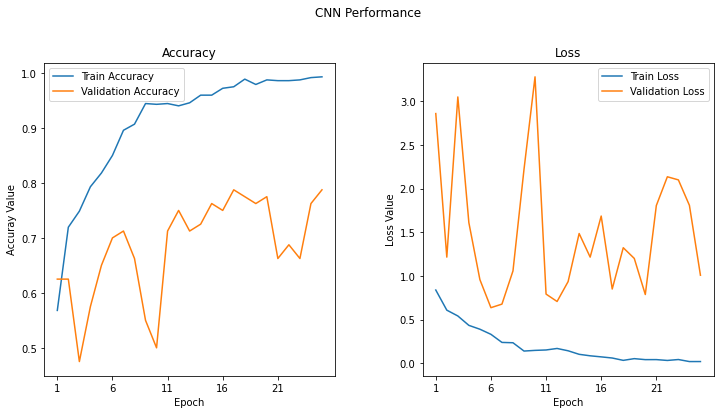

In [81]:
# Result Analysis
print('Test_Accuracy: {:.2f}%'.format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuray Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc='best')

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc='best')

In [82]:
# saving the model
history.model.save('/home/ecampelo/Documentos/Machine learning/CNN_malaria_DL.h5')
# e depois
# model = keras.models.load_model('path/to/location')


In [142]:
# predicting on a group of images
batch_of_images = X_test[0:15]
y_predict = history.model.predict(batch_of_images)
y_predict

array([[9.6782358e-05, 9.0116215e-01],
       [9.9476326e-01, 7.2491169e-04],
       [1.0000000e+00, 4.0226614e-06],
       [1.8383861e-03, 7.3636711e-01],
       [2.0059943e-04, 8.2935059e-01],
       [5.1254803e-05, 9.2448217e-01],
       [9.9999601e-01, 1.1788559e-05],
       [9.9999523e-01, 1.8205690e-05],
       [9.9443865e-01, 3.7431717e-04],
       [9.6214318e-01, 4.3357611e-03],
       [9.7003961e-01, 3.3989549e-04],
       [1.5004777e-06, 9.9999726e-01],
       [1.0940224e-02, 4.6872357e-01],
       [9.9711347e-01, 3.5265386e-03],
       [2.3110086e-05, 9.9551678e-01]], dtype=float32)

In [144]:
# predicting on one image
one_image = X_test[:1]
result = history.model(one_image,  training=False)
result_array = result.numpy()[0]
result_array.tolist()

[9.678245260147378e-05, 0.9011622071266174]

## Simple Image Analyser

This analyzer is not in the video. It is my implementation to be used under Jupyter notebook

In [156]:
from ipywidgets import FileUpload, widgets
from IPython.display import display
# !pip3 install ipyfilechooser
from ipyfilechooser import FileChooser

In [159]:

class ImageTransformer():
    def __init__(self, image):
        self.image = image
        self.img_transformed = None
        self.transform_image()

    def transform_image(self):
        temp_ds = []
        # reads as array
        image = cv2.imread(self.image)
        # convert to image
        image = Image.fromarray(image, 'RGB')
        # resize it 
        image = image.resize((size, size))
        # load it to the dataset as an array
        temp_ds.append(np.array(image))
        
        self.img_transformed = np.array(temp_ds)
        
        
class ImgAnalyser():
    def __init__ (self, img_transformed):
        model_address = '/home/ecampelo/Documentos/Machine learning/CNN_malaria_DL.h5'
        self.model = keras.models.load_model(model_address)
        self.img_transformed = img_transformed
        
    def prediction(self):
        result = self.model(self.img_transformed,  training=False) # tensor object
        result_array = result.numpy()[0] # extract the array from the tensor object        
        prediction = np.argmax(result_array)
        # print(result_array)
        percent = result_array[prediction]
        if percent < 0.5:
            return 'The result is undefined'
        else:
            if prediction:
                return 'This cell has {:.2%} of chance of being parasitized'.format(percent)
            return 'This cell has {:.2%} of chance of being health'.format(percent)

    
class ButtonAnalyzer():
    
    def __init__(self, selected_file: FileChooser):
        self.selected_file = selected_file    
        self.button = widgets.Button(description="Prediction")
        self.button.on_click(self.prediction)
        
    def prediction(self, arg):
        if self.valid_image():
            #print(self.img_transformed)
            #print(self.selected_file.selected)
            analyser = ImgAnalyser(self.img_transformed)
            print(analyser.prediction())
        
    def valid_image(self):
        try:
            if self.file_name.split('.')[1] == 'png': 
                return True
            raise LoaderError('Choose a valid png image')
        except AttributeError:
            print('Choose a valid png image')
        
    @property
    def img_transformed(self):
        return ImageTransformer(self.selected_file.selected).img_transformed
    
    @property
    def file_name(self):
        return self.selected_file.selected_filename
    
class LoaderError(Exception):
    pass

In [160]:
fc = FileChooser('/home/ecampelo/Documentos/Machine learning/Data_files/cell_images/Novas_Imagens')
fc.use_dir_icons = True
fc.filter_pattern = '*.png'
file_label = widgets.Label('Load a Cell Image')
process_label = widgets.Label('Hit for Prediction')

itens_left = widgets.VBox([file_label, fc])
itens_right = widgets.VBox([process_label, ButtonAnalyzer(fc).button])

main_box = widgets.HBox([itens_left, itens_right])
display(main_box)

The result is undefined
This cell has 71.02% of chance of being health
This cell has 95.38% of chance of being health
